# 1 Understanding the Data

In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Our Data is having 1460 rows and 80 independent and 1 dependent variables.The features are both mixture of Numeric Object data types.

# 2 Data Cleaning

### Missing value Treatment

In [5]:
df.isna().sum().sum() # we can see that there are so many missing values in the data.

6965

In [6]:
pd.DataFrame(df.isna().sum()/len(df)).sort_values(by=0,ascending=False).head(15)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479


* we can see that in 'PoolQC','MiscFeature','Alley','Fence' Features 80% data is missing , and in 'FireplaceQu' around 40%data is missing, So we can delete these Features.

In [7]:
df.drop(columns= ['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],inplace=True)

In [8]:
miss_df = pd.DataFrame(df.isna().sum()/len(df)).sort_values(by=0,ascending=False)
miss_df = miss_df[miss_df[0]>0]
miss_df

,0
LotFrontage,0.177397
GarageType,0.055479
GarageYrBlt,0.055479
GarageFinish,0.055479
GarageQual,0.055479
GarageCond,0.055479
BsmtFinType2,0.026027
BsmtExposure,0.026027
BsmtQual,0.025342
BsmtCond,0.025342


In [9]:
# Lets see which Features are having Missing values and thier data types
df[miss_df.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   GarageType    1379 non-null   object 
 2   GarageYrBlt   1379 non-null   float64
 3   GarageFinish  1379 non-null   object 
 4   GarageQual    1379 non-null   object 
 5   GarageCond    1379 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   BsmtExposure  1422 non-null   object 
 8   BsmtQual      1423 non-null   object 
 9   BsmtCond      1423 non-null   object 
 10  BsmtFinType1  1423 non-null   object 
 11  MasVnrArea    1452 non-null   float64
 12  MasVnrType    1452 non-null   object 
 13  Electrical    1459 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


* we can see the LotFrontage and MasVnrArea are numerical Variables, So lets observe their distribution.
* Even though GarageYrBlt  is numerical we have to treat it as object because it is year and only 10 values are present in it. 

Let,s See the distribution of some variables before proceding with missing value replacement.

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

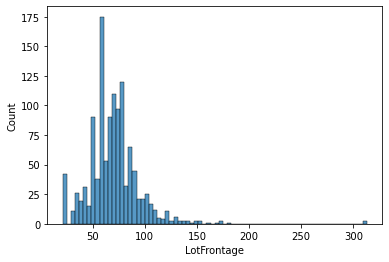

In [10]:
sns.histplot(df['LotFrontage'])

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

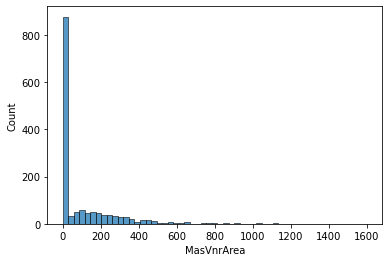

In [11]:
sns.histplot(df['MasVnrArea'])

* we can observe that LotFrontage and MasVnrArea are having many Outliers so we replace the missing values with Median 

In [12]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())


* we will replace the Remaining features values with Mode as they are categorical.

In [14]:
cat =list(miss_df.index)
cat.remove("LotFrontage")
cat.remove("MasVnrArea")
cat

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrType',
 'Electrical']

In [15]:
for i in cat:
    df[i] = df[i].fillna(df[i].mode()[0])

In [16]:
df.isna().sum().sum()

0

## Outlier Treatment

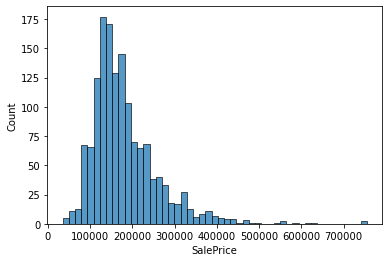

In [17]:
# Lets see the Target Variable
sns.histplot(df["SalePrice"])
plt.show()

In [18]:
# Lets select all the numerical Variables
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [19]:
df_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Here although MSSubClass,OverallCond,OverallQual are numeric , but we know they are categorical Representation from Data Dictionary.

In [20]:
df_numeric.drop(columns=['MSSubClass'],inplace=True)# we are not dropping OverallCond,OverallQual because they are Ordinal .

In [21]:
df.shape

(1460, 75)

In [22]:
# Removing Outlier with IQRTechnique
q1 = df[df_numeric.columns].quantile(0.10)
q3 = df[df_numeric.columns].quantile(0.90)
iqr = q3 - q1
df = df[~((df[df_numeric.columns] < (q1 - 1.5 * iqr)) |(df[df_numeric.columns] > (q3 + 1.5 * iqr))).any(axis=1)]

In [23]:
df.shape

(1014, 75)

In [24]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,...,1014.000000,1014.000000,1014.000000,1014.0,1014.0,1014.0,1014.0,1014.000000,1014.000000,1014.000000
mean,55.167653,68.154832,9261.867850,6.181460,5.500986,1975.306706,1986.803748,97.129191,429.929980,7.189349,...,92.857002,46.671598,19.867850,0.0,0.0,0.0,0.0,6.274162,2007.797830,179525.939842
std,41.285148,19.243098,3702.894167,1.384091,1.037071,30.118843,20.774442,153.429965,427.076959,35.916565,...,116.467038,59.773888,54.504592,0.0,0.0,0.0,0.0,2.688461,1.330616,72908.163097
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7200.000000,5.000000,5.000000,1955.000000,1970.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000,2007.000000,128600.000000
50%,50.000000,69.000000,9100.500000,6.000000,5.000000,1979.000000,1997.000000,0.000000,391.000000,0.000000,...,0.000000,30.000000,0.000000,0.0,0.0,0.0,0.0,6.000000,2008.000000,165000.000000
75%,60.000000,78.000000,11205.250000,7.000000,6.000000,2003.000000,2005.000000,167.750000,727.000000,0.000000,...,168.000000,68.000000,0.000000,0.0,0.0,0.0,0.0,8.000000,2009.000000,216375.000000
max,190.000000,153.000000,26178.000000,10.000000,9.000000,2010.000000,2010.000000,816.000000,1904.000000,290.000000,...,576.000000,319.000000,272.000000,0.0,0.0,0.0,0.0,12.000000,2010.000000,501837.000000


### Observing Correlations

In [25]:
cor= df_numeric.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.124098,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


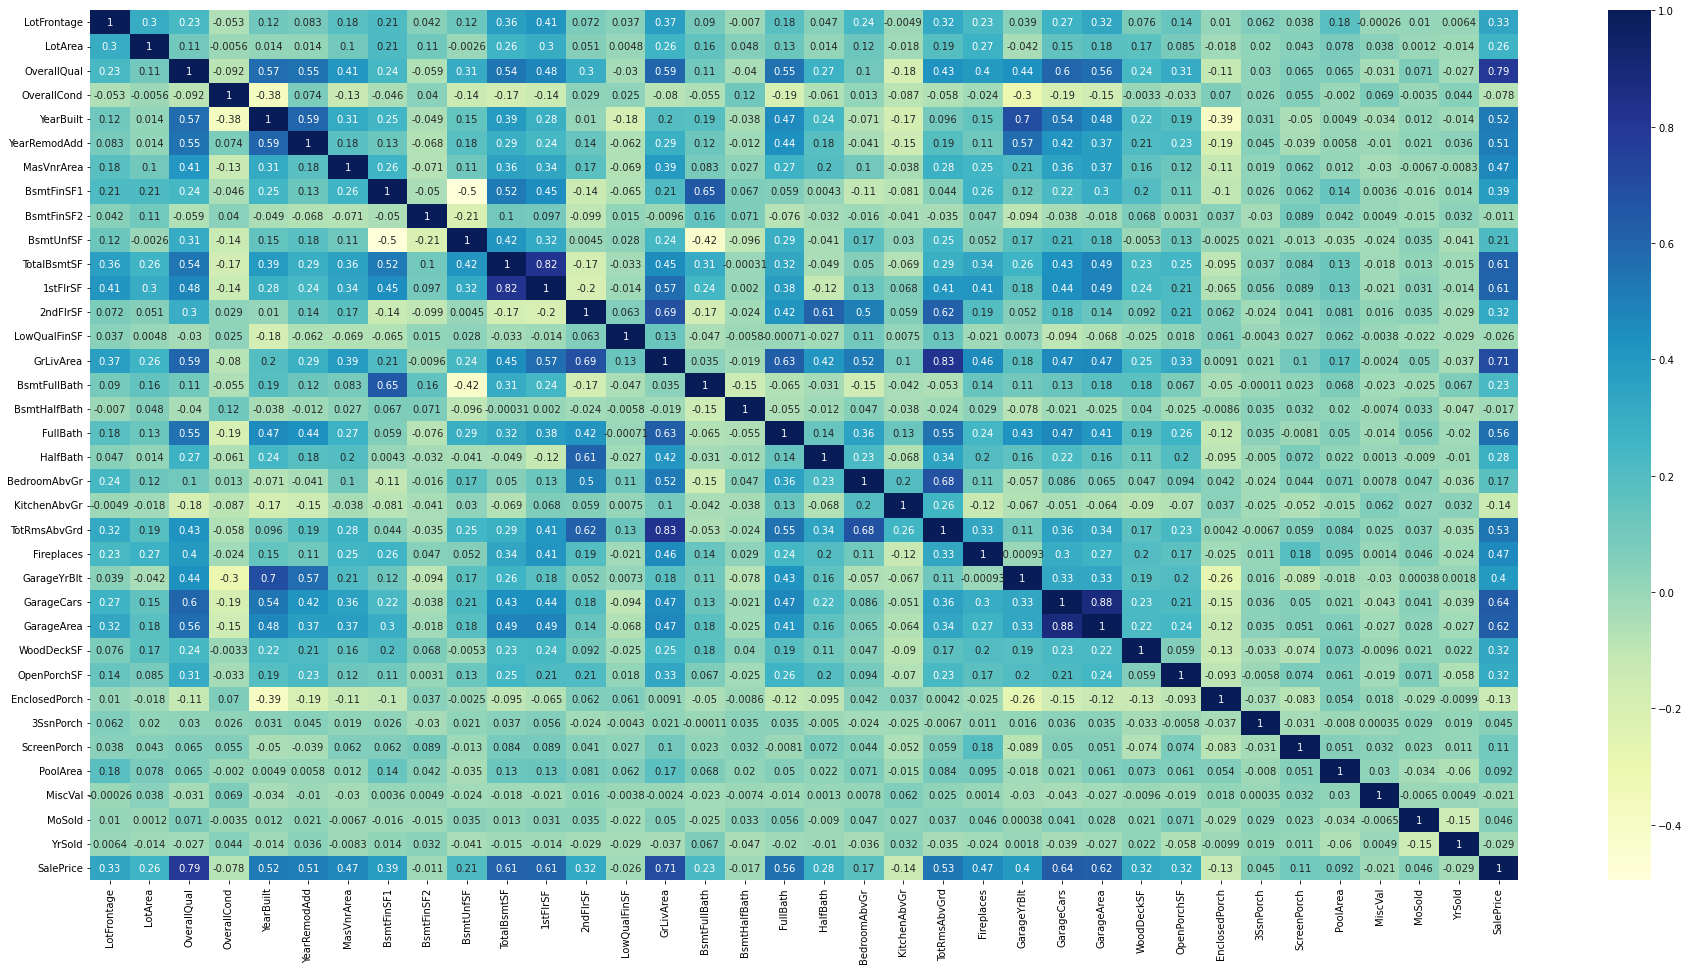

In [26]:
# plotting correlations on a heatmap

plt.figure(figsize=(32,16)) # figure size

sns.heatmap(cor, cmap="YlGnBu", annot=True)# heatmap
plt.show()

Here we can See that Sale Price is higly related with Grlivareaand OverallQual Features and many Other Features.

Garageyrbuilt and Yearbuilt are also highly correlated which says most of the Garages are built in the same year as house .

We can Also see that 1stflrSf is higly correlated with TotalBsmtSF which is absolutely gives sense.

And also TotRmsAbvGr is higly correlated with GrLivArea 

Finally we can Observe that GarageCars are higly correlated with GarageArea.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1456
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1014 non-null   int64  
 1   MSZoning       1014 non-null   object 
 2   LotFrontage    1014 non-null   float64
 3   LotArea        1014 non-null   int64  
 4   Street         1014 non-null   object 
 5   LotShape       1014 non-null   object 
 6   LandContour    1014 non-null   object 
 7   Utilities      1014 non-null   object 
 8   LotConfig      1014 non-null   object 
 9   LandSlope      1014 non-null   object 
 10  Neighborhood   1014 non-null   object 
 11  Condition1     1014 non-null   object 
 12  Condition2     1014 non-null   object 
 13  BldgType       1014 non-null   object 
 14  HouseStyle     1014 non-null   object 
 15  OverallQual    1014 non-null   int64  
 16  OverallCond    1014 non-null   int64  
 17  YearBuilt      1014 non-null   int64  
 18  YearRemo

we have to convert data type of 'MSSubClass' column to categorical eventhough it is numerical.

In [28]:
df['MSSubClass'] = df['MSSubClass'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1456
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1014 non-null   object 
 1   MSZoning       1014 non-null   object 
 2   LotFrontage    1014 non-null   float64
 3   LotArea        1014 non-null   int64  
 4   Street         1014 non-null   object 
 5   LotShape       1014 non-null   object 
 6   LandContour    1014 non-null   object 
 7   Utilities      1014 non-null   object 
 8   LotConfig      1014 non-null   object 
 9   LandSlope      1014 non-null   object 
 10  Neighborhood   1014 non-null   object 
 11  Condition1     1014 non-null   object 
 12  Condition2     1014 non-null   object 
 13  BldgType       1014 non-null   object 
 14  HouseStyle     1014 non-null   object 
 15  OverallQual    1014 non-null   int64  
 16  OverallCond    1014 non-null   int64  
 17  YearBuilt      1014 non-null   int64  
 18  YearRemo

In [29]:
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,...,1014.000000,1014.000000,1014.000000,1014.0,1014.0,1014.0,1014.0,1014.000000,1014.000000,1014.000000
mean,68.154832,9261.867850,6.181460,5.500986,1975.306706,1986.803748,97.129191,429.929980,7.189349,601.819527,...,92.857002,46.671598,19.867850,0.0,0.0,0.0,0.0,6.274162,2007.797830,179525.939842
std,19.243098,3702.894167,1.384091,1.037071,30.118843,20.774442,153.429965,427.076959,35.916565,440.236892,...,116.467038,59.773888,54.504592,0.0,0.0,0.0,0.0,2.688461,1.330616,72908.163097
min,21.000000,1300.000000,1.000000,2.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,2006.000000,35311.000000
25%,60.000000,7200.000000,5.000000,5.000000,1955.000000,1970.000000,0.000000,0.000000,0.000000,261.250000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000,2007.000000,128600.000000
50%,69.000000,9100.500000,6.000000,5.000000,1979.000000,1997.000000,0.000000,391.000000,0.000000,524.000000,...,0.000000,30.000000,0.000000,0.0,0.0,0.0,0.0,6.000000,2008.000000,165000.000000
75%,78.000000,11205.250000,7.000000,6.000000,2003.000000,2005.000000,167.750000,727.000000,0.000000,847.000000,...,168.000000,68.000000,0.000000,0.0,0.0,0.0,0.0,8.000000,2009.000000,216375.000000
max,153.000000,26178.000000,10.000000,9.000000,2010.000000,2010.000000,816.000000,1904.000000,290.000000,2153.000000,...,576.000000,319.000000,272.000000,0.0,0.0,0.0,0.0,12.000000,2010.000000,501837.000000


## One Hot Encoding

In [30]:
# creating dummy variables for categorical variables

# subset all categorical variables

df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
6,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [31]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [32]:
# drop categorical variables 
df = df.drop(list(df_categorical.columns), axis=1)

In [33]:
# concat dummy variables with X
df = pd.concat([df, df_dummies], axis=1)

# 3  Modeling

In [34]:
# Lets Divide the data into Train And Test
X = df[df.columns[df.columns!="SalePrice"]]

In [35]:
y = df["SalePrice"]

In [36]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.75,
                                                    test_size = 0.25, random_state=100)

### Feature Scaling

In [37]:
df_numeric.drop(columns="SalePrice",inplace=True)

In [38]:
df_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [39]:
# scaling the features - necessary before using Ridge or Lasso

from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale = MinMaxScaler()


In [40]:
X_train[df_numeric.columns] = scale.fit_transform(X_train[df_numeric.columns])
X_test[df_numeric.columns] = scale.transform(X_test[df_numeric.columns])

## Linear Regression

In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
rfe = RFE(lm, 30)# Lets Select Top 30 Features For Linear Regression
rfe = rfe.fit(X_train, y_train)

In [43]:
lr_col = X_train.columns[rfe.support_]
lr_col

Index(['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenAbvGr', 'MSSubClass_45', 'MSSubClass_75',
       'MSSubClass_90', 'MSSubClass_190', 'LandSlope_Sev', 'BldgType_2fmCon',
       'BldgType_Duplex', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_TA'],
      dtype='object')

In [44]:
X_train_lr=X_train[lr_col]
X_test_lr=X_test[lr_col]

In [45]:
lm1=lm.fit(X_train,y_train) # Lets fit another model for Comaprision Purpose.
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

5399820231120165.0
[-5.84736803e+03  3.42873587e+04  4.86726112e+04  3.79287687e+04
  3.94839864e+04  5.03698181e+03  2.00759649e+04  2.08815848e+16
  3.18049349e+15  2.24389299e+16 -2.88766874e+16  9.10471087e+15
  7.19981051e+15 -9.69700900e+15 -1.25105618e+16 -3.26500000e+02
  1.17484232e+15  1.91250000e+03  1.20050000e+03 -1.58161250e+04
  5.29544035e+14  1.23177812e+04  4.60637500e+03  3.95575000e+03
  1.80009062e+04  1.52187812e+04  6.53806250e+03  8.33125000e+03
  7.79918750e+03 -2.30661805e+15 -2.13827343e+15  5.23977642e+15
 -7.94289953e+14  3.61625000e+03 -1.27175000e+03  2.75225000e+03
  4.33837500e+03  2.03629127e+13 -2.45775000e+03  3.02500000e+02
 -6.73500000e+03  9.17150770e+14 -1.71690625e+04 -1.42617500e+04
  1.86937013e+15 -1.08275000e+04 -1.44975000e+04 -1.83868750e+04
  4.88839416e+14  4.41382500e+04  3.89960000e+04  3.21938750e+04
  2.87432500e+04 -8.51248881e+14  4.46281250e+03 -6.38475000e+03
  1.48650000e+03 -2.60925000e+03 -2.79300273e+04 -4.11525000e+03
  3.25

In [46]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for RFE Model
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.767859002440244
0.7644506217755073
822821339645.8408
421721971084.41003
1082659657.4287379
1660322720.804764


## Ridge

In [47]:
import sklearn
sklearn.metrics.SCORERS.keys() # see all scoring Metrics

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [48]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,1500,2000,2500,5000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500, 2000, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [50]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.16770871e+03  2.01324479e+04  3.69102501e+04  2.08260268e+04
  1.22388764e+04  8.16959188e+03  1.90071421e+04  3.41732867e+04
  1.72783685e+03  7.11200155e+03  3.04284716e+04  4.10414957e+04
  2.86946484e+04  0.00000000e+00  4.63821683e+04  2.34031484e+03
  0.00000000e+00  1.63550413e+04  3.64941076e+03 -2.07315649e+02
  0.00000000e+00  2.39651722e+04  9.15112025e+03  9.84075325e+01
  1.82169832e+04  1.92220616e+04  7.82476106e+03  8.64248262e+03
  2.58781205e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.22141189e+03 -1.20168197e+03 -2.13724467e+03
  4.34437243e+03  1.38999149e+03  1.00463831e+01  7.38700407e+03
  8.90474739e+02  4.19280764e+03 -2.88681086e+03 -3.94448481e+02
 -5.08324639e+03 -5.75916820e+03 -8.31889182e+03 -1.82974758e+03
 -5.25621166e+03  8.68737720e+03  7.20228235e+03  4.09470546e+03
 -2.58329566e+03  0.00000000e+00  2.33982580e+03 -3.02277103e+03
  1.45641052e+03  1.51056421e+03 -1.20436821e+04 -1.47581619e+02
  4.61370917e+03 -8.11357

In [51]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.939353310251312
0.9206912510563677
214961557969.76746
141992486589.67358
282844155.22337824
559025537.7546204


## Lasso

In [52]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500, 2000, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_,model_cv.best_score_)

{'alpha': 100} -14127.205190798015


In [54]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [55]:
lasso.coef_

array([ 0.00000000e+00,  2.02973986e+04,  5.67037193e+04,  2.68595673e+04,
        2.74866144e+04,  5.13639406e+03,  1.90991100e+04,  3.43616875e+04,
        0.00000000e+00,  0.00000000e+00,  3.25203865e+04,  1.65953331e+04,
        0.00000000e+00,  0.00000000e+00,  1.45195619e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.24636363e+02, -0.00000000e+00,
        0.00000000e+00,  1.05292086e+04,  5.47617597e+03,  0.00000000e+00,
        1.84649696e+04,  1.49546195e+04,  5.86897621e+03,  7.30833875e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.83538367e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  8.25532620e+03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -6.09263688e+02, -3.00883513e+03, -0.00000000e+00,
       -0.00000000e+00,  6.40372314e+03,  0.00000000e+00,  0.00000000e+00,
       -5.54186147e+03,  

In [56]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9354790895174223
0.9246365762428156
228693692869.90387
134928870770.6072
300912753.7761893
531216026.65593386


In [57]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metrics = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metrics

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),7.678590e-01,9.393533e-01,9.354791e-01
1,R2 Score (Test),7.644506e-01,9.206913e-01,9.246366e-01
2,RSS (Train),8.228213e+11,2.149616e+11,2.286937e+11
3,RSS (Test),4.217220e+11,1.419925e+11,1.349289e+11
4,MSE (Train),3.290379e+04,1.681797e+04,1.734684e+04
5,MSE (Test),4.074706e+04,2.364372e+04,2.304812e+04


# 4 Model Evaluation

*We can Observe that R2 values of Lasso is greater than that of Ridge For Test data set.*

### Residual Analysis

In [58]:
ridge_pred = ridge.predict(X_test)

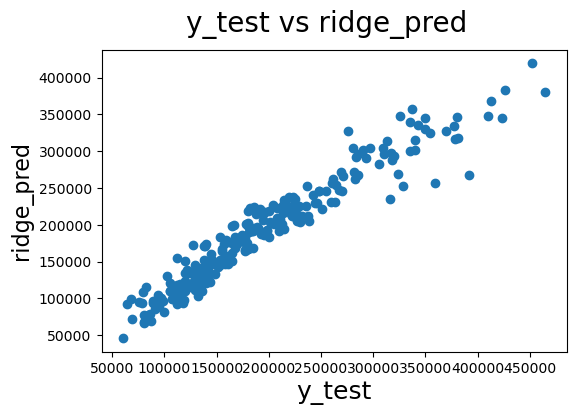

In [59]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

In [60]:
lasso_pred = lasso.predict(X_test)

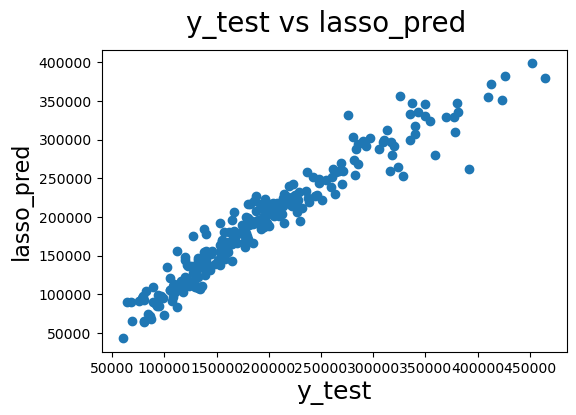

In [61]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

#### Residual Distribution

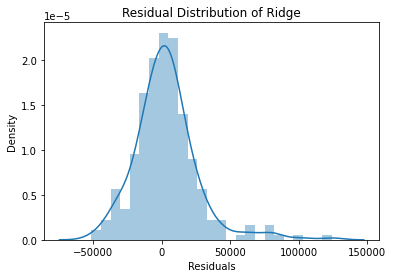

In [62]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res)
plt.title('Residual Distribution of Ridge')
plt.xlabel("Residuals")
plt.show()

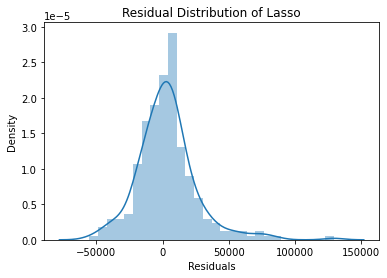

In [63]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res)
plt.title('Residual Distribution of Lasso')
plt.xlabel("Residuals")
plt.show()

## Lets Observe the Effects On Coefficients due to Regularization

In [64]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [65]:
betas['Linear'] = lm1.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [66]:
pd.set_option('display.max_rows', None)
print(betas)

                             Linear         Ridge          Lasso
LotFrontage           -5.847368e+03   2167.708705       0.000000
LotArea                3.428736e+04  20132.447889   20297.398604
OverallQual            4.867261e+04  36910.250129   56703.719301
OverallCond            3.792877e+04  20826.026772   26859.567311
YearBuilt              3.948399e+04  12238.876361   27486.614408
YearRemodAdd           5.036982e+03   8169.591877    5136.394056
MasVnrArea             2.007596e+04  19007.142064   19099.110023
BsmtFinSF1             2.088158e+16  34173.286652   34361.687464
BsmtFinSF2             3.180493e+15   1727.836852       0.000000
BsmtUnfSF              2.243893e+16   7112.001550       0.000000
TotalBsmtSF           -2.887669e+16  30428.471570   32520.386468
1stFlrSF               9.104711e+15  41041.495734   16595.333102
2ndFlrSF               7.199811e+15  28694.648413       0.000000
LowQualFinSF          -9.697009e+15      0.000000       0.000000
GrLivArea             -1.

* We can Observe that Lasso makes Lot of features to Zero because of high alpha value

In [67]:
betas["Lasso"].value_counts()[0] # No of variables value equal to Zero for alpha = 100 in Lasso

142

# Description Questions 

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Answer 
*The Optimum value of alpha for Ridge and Lasso are 4 and 100 Respectively.*

In [68]:
# Double the alpha for Ridge Regression from 4 to 8
alpha = 8
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)

Ridge(alpha=8)

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9323807410178085
0.9108652746085143
239675756744.6213
159584679728.3385
315362837.82187015
628286140.66275


In [70]:
# Double the alpha for Ridge Regression from 100 to 200
alpha =200
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train, y_train) 

Lasso(alpha=200)

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9264445633351519
0.9139977986410903
260716476499.26947
153976283648.31073
343047995.39377564
606205841.1350816


In [72]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metrics_double = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metrics_double

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.323807e-01,9.264446e-01
1,R2 Score (Test),9.108653e-01,9.139978e-01
2,RSS (Train),2.396758e+11,2.607165e+11
3,RSS (Test),1.595847e+11,1.539763e+11
4,MSE (Train),1.775846e+04,1.852155e+04
5,MSE (Test),2.506564e+04,2.462125e+04


In [73]:
final_metrics

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),7.678590e-01,9.393533e-01,9.354791e-01
1,R2 Score (Test),7.644506e-01,9.206913e-01,9.246366e-01
2,RSS (Train),8.228213e+11,2.149616e+11,2.286937e+11
3,RSS (Test),4.217220e+11,1.419925e+11,1.349289e+11
4,MSE (Train),3.290379e+04,1.681797e+04,1.734684e+04
5,MSE (Test),4.074706e+04,2.364372e+04,2.304812e+04


* We can Observe that for both Models the R2 Score on Test and train decreased which is a sign of underfitting .
* We can also Observe that for both models the Rss and MSE value is Increased which is also a sign of underfitting .

In [74]:
#Co-efficients
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head()

,Ridge2,Ridge,Lasso,Lasso2
LotFrontage,4608.853003,2167.708705,0.000000,0.000000
LotArea,17794.105988,20132.447889,20297.398604,18156.618705
OverallQual,31365.160494,36910.250129,56703.719301,60258.348561
OverallCond,15444.006039,20826.026772,26859.567311,17371.446959
YearBuilt,8197.301170,12238.876361,27486.614408,16181.928846


* We can Observe that the coefficents of the predictor's changed a lot.

In [75]:
betas['Lasso'].value_counts()[0] # count of Zero coeffecient variables with alpha 100

142

In [76]:
betas['Lasso2'].value_counts()[0] # count of Zero coeffecient variables with alpha 200

163

* We can Clearly see that when we Increased the Alpha value, The no of variables which coeffecients are equal to zero Increased from 142 to 163.
* So model excluded 21 variables when alpha becomes doubled ( which is useful for feature selection).

### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

#### Answer
* I personally choose Lasso Regression Because the The R2 Score are slighly high and also RSS and MSE are also less compared to Ridge.
* When it comes to Lambda (alpha) values I choose the First alpha values 4,100 for Ridge and lasso Respectively , Beacuse when i choose the Doubled Alpha values the R2 Score on Test and train decreased and also Rss and MSE value is Increased. 

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer


1) Lets start with Ridge Model

In [77]:
ridge_imp = pd.DataFrame()
ridge_imp["Feature"] = pd.Series(X.columns)
ridge_imp["imp"] = pd.Series(ridge.coef_)
ridge_imp["abs_imp"] = [abs(t) for t in ridge.coef_]
ridge_imp = ridge_imp.sort_values(by = "abs_imp",ascending = False)
print(ridge_imp.head(5))
ridge_imp_fea = list(ridge_imp.head(5)["Feature"])
ridge_imp_fea

        Feature           imp       abs_imp
14    GrLivArea  46382.168251  46382.168251
11     1stFlrSF  41041.495734  41041.495734
2   OverallQual  36910.250129  36910.250129
7    BsmtFinSF1  34173.286652  34173.286652
10  TotalBsmtSF  30428.471570  30428.471570


['GrLivArea', '1stFlrSF', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF']

* The top 5 important Features in ridge model are 'GrLivArea', '1stFlrSF', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF'.

In [78]:
# lets drop them 
X_train1r = X_train.drop(columns=ridge_imp_fea)
X_test1r = X_test.drop(columns=ridge_imp_fea)

In [79]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,1500,2000,2500,5000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train1r, y_train) 


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500, 2000, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [81]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train1r, y_train)
#print(ridge1.coef_)

Ridge(alpha=3.0)

In [82]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge1.predict(X_train1r)
y_pred_test = ridge1.predict(X_test1r)

metric_r1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_r1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_r1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_r1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_r1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_r1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_r1.append(mse_test_lr**0.5)

0.9205224293210008
0.8806680763698564
281707418617.6762
213649020965.08936
370667656.07588977
841137877.8153124


In [83]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')

rg_metric1 = pd.Series(metric_r1, name = 'Ridge Regression_New')


metrics_r = pd.concat([lr_metric, rg_metric,rg_metric1], axis = 1)

metrics_r

,Metric,Ridge Regression,Ridge Regression_New
0,R2 Score (Train),9.323807e-01,9.205224e-01
1,R2 Score (Test),9.108653e-01,8.806681e-01
2,RSS (Train),2.396758e+11,2.817074e+11
3,RSS (Test),1.595847e+11,2.136490e+11
4,MSE (Train),1.775846e+04,1.925273e+04
5,MSE (Test),2.506564e+04,2.900238e+04


*We can Clearly Observe that the R2 score of the test data set decreased compared to old model.*

In [84]:
ridge_imp1 = pd.DataFrame()
ridge_imp1["Feature"] = pd.Series(X_train1r.columns)
ridge_imp1["imp"] = pd.Series(ridge1.coef_)
ridge_imp1["abs_imp"] = [abs(t) for t in ridge1.coef_]
ridge_imp1 = ridge_imp1.sort_values(by = "abs_imp",ascending = False)
print(ridge_imp.head(5))
ridge_imp_fea1 = list(ridge_imp1.head(5)["Feature"])
ridge_imp_fea1

        Feature           imp       abs_imp
14    GrLivArea  46382.168251  46382.168251
11     1stFlrSF  41041.495734  41041.495734
2   OverallQual  36910.250129  36910.250129
7    BsmtFinSF1  34173.286652  34173.286652
10  TotalBsmtSF  30428.471570  30428.471570


['TotRmsAbvGrd', 'Neighborhood_StoneBr', '2ndFlrSF', 'FullBath', 'GarageArea']

***The new Top 5 features are 'TotRmsAbvGrd', 'Neighborhood_StoneBr', '2ndFlrSF', 'FullBath', 'GarageArea'.***


*2) For Lasso Model.*

In [85]:
lasso_imp = pd.DataFrame()
lasso_imp["Feature"] = pd.Series(X.columns)
lasso_imp["imp"] = pd.Series(lasso.coef_)
lasso_imp["abs_imp"] = [abs(t) for t in lasso.coef_]
lasso_imp = lasso_imp.sort_values(by = "abs_imp",ascending = False)
print(lasso_imp.head(5))
lasso_imp_fea = list(lasso_imp.head(5)["Feature"])
print(lasso_imp_fea)

                 Feature            imp        abs_imp
14             GrLivArea  145195.619477  145195.619477
2            OverallQual   56703.719301   56703.719301
7             BsmtFinSF1   34361.687464   34361.687464
10           TotalBsmtSF   32520.386468   32520.386468
87  Neighborhood_StoneBr   31971.621494   31971.621494
['GrLivArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'Neighborhood_StoneBr']


* The top 5 important Features in Lasso model are 'GrLivArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'Neighborhood_StoneBr'.

In [86]:
# lets drop them 
X_train1l = X_train.drop(columns=lasso_imp_fea)
X_test1l= X_test.drop(columns=lasso_imp_fea)

In [87]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train1l, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500, 2000, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [89]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =model_cv.best_params_['alpha']

lasso1 = Lasso(alpha=alpha)
        
lasso1.fit(X_train1l, y_train) 
#print(lasso1.coef_)

Lasso(alpha=100)

In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso1.predict(X_train1l)
y_pred_test = lasso1.predict(X_test1l)

metric_l1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_l1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_l1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_l1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_l1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_l1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_l1.append(mse_test_lr**0.5)

0.9257559656924212
0.9085812155430923
263157203647.1002
163674004431.30988
346259478.48302656
644385844.2177554


In [91]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

ls_metric = pd.Series(metric2, name = 'Lasso Regression')
ls_metric1 = pd.Series(metric_l1, name = 'Lasso Regression_New')

final_metrics_all = pd.concat([lr_metric,ls_metric, ls_metric1], axis = 1)

final_metrics_all

,Metric,Lasso Regression,Lasso Regression_New
0,R2 Score (Train),9.264446e-01,9.257560e-01
1,R2 Score (Test),9.139978e-01,9.085812e-01
2,RSS (Train),2.607165e+11,2.631572e+11
3,RSS (Test),1.539763e+11,1.636740e+11
4,MSE (Train),1.852155e+04,1.860805e+04
5,MSE (Test),2.462125e+04,2.538476e+04


*We can Clearly Observe that the R2 score of the test data set is Slightly decreased compared to old model.*

In [92]:
lasso_imp1 = pd.DataFrame()
lasso_imp1["Feature"] = pd.Series(X_train1l.columns)
lasso_imp1["imp"] = pd.Series(lasso1.coef_)
lasso_imp1["abs_imp"] = [abs(t) for t in lasso1.coef_]
lasso_imp1 = lasso_imp1.sort_values(by = "abs_imp",ascending = False)
print(lasso_imp1.head(5))
lasso_imp_fea1 = list(lasso_imp1.head(5)["Feature"])
lasso_imp_fea1

            Feature            imp        abs_imp
8          1stFlrSF  177754.733646  177754.733646
9          2ndFlrSF   81652.315402   81652.315402
3         YearBuilt   31721.495953   31721.495953
2       OverallCond   27507.910087   27507.910087
189  KitchenQual_TA  -26069.597794   26069.597794


['1stFlrSF', '2ndFlrSF', 'YearBuilt', 'OverallCond', 'KitchenQual_TA']

***The new Top 5 features are '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'OverallCond', 'KitchenQual_TA'.***


### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

#### Answer
1. The model should be generalized so that the accuracy of the test Should not be much less than the training points so that the model will be giving similar accuracy For Other data sets too.
2. We should also take care that our model should not be affected by Outliers, And should not given more importance to the column containing outliers which leads to overfit , So we should delete Outliers before training the model. 
3. The Model Should have high R^2 Score which makes sure that our model covered the most of the variance from the data. so that even any variation in the data should not effect the model much.
4. To make sure the model is robust and generalizable, we must be careful not to overfit it. This is because the overfit model has very high variability and a small change in the data greatly affects the model prediction. Such a model would identify all training data patterns, but fail to select patterns in unseen test data.
5. In other words, the model should not be too complex in order to be robust and generalizable and also Should not be too simple to underfit.
6. If we look at it from the prespective of Accuracy, the most complex model will have the highest accuracy. Therefore, in order to make our model more robust and generalizable, we will need to reduce the variance that will lead to certain biases. Increased bias means that accuracy will decrease  by a little bit.So we need to sacrifice some variance and accuracy for the bias.
7. In general, we should find a balance between model accuracy and complexity. This can be achieved with strategies such as Ridge Regression and Lasso.